## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [149]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [150]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [151]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [152]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [153]:
total = df['user_id'].nunique()
pct_convert = df.query('converted == 1').user_id.nunique()/total
print(pct_convert)

0.12104245244060237


e. The number of times the `new_page` and `treatment` don't line up.

In [154]:
glp1 = df.query('group == "control" and landing_page == "new_page"').count()
glp2 = df.query('group == "treatment" and landing_page == "old_page"').count()
print(glp1 + glp2)

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64


f. Do any of the rows have missing values?

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [156]:
#By Quiz 2, we should remove rows we do not have confidence in, thus we will remove rows with misaligned data
oldctl = df.query('group == "control" and landing_page == "old_page"')
newtrt = df.query('group == "treatment" and landing_page == "new_page"')
df2 = oldctl.append(newtrt)

In [157]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [158]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [159]:
df2.loc[df2['user_id'].duplicated(),:]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [160]:
df2.drop_duplicates(inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [161]:
total = df2.nunique()
pct_conv = df2.query('converted == 1').user_id.nunique()/total
print(pct_conv)

user_id             0.119597
timestamp           0.119597
group           17376.500000
landing_page    17376.500000
converted       17376.500000
dtype: float64


b. Given that an individual was in the `control` group, what is the probability they converted?

In [162]:
cont_total = df2.query('group == "control"').nunique()
pct_conv_cont = df2.query('group == "control" and converted == 1').user_id.nunique()
print(pct_conv_cont/cont_total['user_id'])

0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [163]:
trt_total = df2.query('group == "treatment"').nunique()
pct_conv_trt = df2.query('group == "treatment" and converted == 1').user_id.nunique()
print(pct_conv_trt/trt_total['user_id'])

0.118808065515


In [164]:
p_diff_ab = (pct_conv_trt/trt_total['user_id']) - (pct_conv_cont/cont_total['user_id'])
print(p_diff_ab)

-0.00157823898536


d. What is the probability that an individual received the new page?

In [165]:
new_count = df2.query('landing_page == "new_page"').count()
old_count = df2.query('landing_page == "old_page"').count()
print(new_count/(old_count + new_count))

user_id         0.500064
timestamp       0.500064
group           0.500064
landing_page    0.500064
converted       0.500064
dtype: float64


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Given that there is an equal probability that the users in this trial recieved either the new page or the old page and that conversion of the treatment group was lower than that of the control by about one percent, it seems like the new treatment page does not lead to more conversions. However, at this time, it is still too early to tell and there is not sufficient evidence to support this claim. What I have proposed could be written as a hypothesis for hypothesis testing, which could provided sufficent evidence to reject an etablished null hypothesis**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Since we are attempting to discern which campaign does better, we should use a one-sided test.**

$$H_0: p_{old} - p_{new} \geq 0$$


$$H_a: p_{new} - p_{old} > 0$$


** **$p_{old}$** and **$p_{new}$** are the converted rates for the old and new pages, respectivley.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

** **$p_{new}$**, by statement of the problem under the null hypothesis should be equal to **$p_{old}$**, both of which are the convert rates regardless of page or %11.96.**

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

** **$p_{old}$**, by statement of the problem under the null hypothesis should be equal to **$p_{new}$**, both of which are the convert rates regardless of page or %11.96.**

c. What is $n_{new}$?

In [166]:
n_new = df2.query('group == "treatment"')['user_id'].nunique()
n_new

145310

d. What is $n_{old}$?

In [167]:
n_old = df2.query('group == "control"')['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [168]:
new_page_converted = df2.sample(n_new, replace = True)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [169]:
old_page_converted = df2.sample(n_old, replace = True)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [170]:
#Find P_old
old_page_total = old_page_converted.query('group == "control"').nunique()
old_page_count = old_page_converted.query('group == "control" and converted == 1').user_id.nunique()
p_old = old_page_count/old_page_total['user_id']
#Find P_new
new_page_total = new_page_converted.query('group == "treatment"').nunique()
new_page_count = new_page_converted.query('group == "treatment" and converted == 1').user_id.nunique()
p_new = new_page_count/new_page_total['user_id']
#Find and display hte difference between the two
p_diff = p_new - p_old
p_diff

-0.001275016699348

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [195]:
#p_diffs = []

"""for _ in range(10000):
    new_page_converted = df2.sample(n_new, replace = True)
    old_page_converted = df2.sample(n_old, replace = True)
    old_page_total = old_page_converted.query('group == "control"').nunique()
    p_old = old_page_converted.query('group == "control" and converted == 1').user_id.nunique()/old_page_total.count()
    new_page_total = new_page_converted.query('group == "treatment"').nunique()
    p_new = new_page_converted.query('group == "treatment" and converted == 1').user_id.nunique()/new_page_total.count()
    p_diffs.append(p_new - p_old)"""
    
new_converted_simulation = np.random.binomial(n_new, .1196,  10000)/n_new
old_converted_simulation = np.random.binomial(n_old, .1196,  10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation
print(p_diffs)

[ 0.00017683 -0.00106886  0.0004246  ..., -0.00023604  0.00021805
  0.00224832]


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   41.,   241.,   885.,  2071.,  2924.,  2361.,  1107.,   309.,
           58.,     3.]),
 array([-0.00409723, -0.0032059 , -0.00231458, -0.00142326, -0.00053194,
         0.00035938,  0.00125071,  0.00214203,  0.00303335,  0.00392467,
         0.004816  ]),
 <a list of 10 Patch objects>)

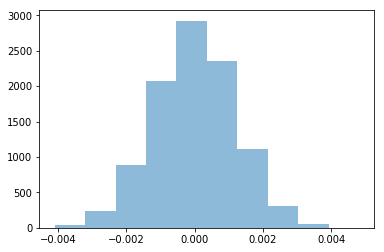

In [196]:
plt.hist(p_diffs, alpha = 0.5)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [197]:
(p_diffs > p_diff_ab).mean()

0.90510000000000002

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**What we calculated above is referred to as the p-value, which is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true. Large p-values suggest we should not move away from the null hypothesis. In our case, it appears that we have a small p-value and thus should reject the null hypothesis. **

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [174]:
#Import stats model
import statsmodels.api as sm

#Fill in the variables with the relevant queries
convert_old = df2.query('group == "control" and converted == 1').user_id.nunique()
convert_new = df2.query('group == "treatment" and converted == 1').user_id.nunique()
n_old = df2.query('group == "control"')['user_id'].nunique()
n_new = df2.query('group == "treatment"')['user_id'].nunique()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [199]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], value=0, alternative='smaller')
print(z_score)
print(p_value)

1.31092419842
0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**According to the documentation, if the z score exceeds the critical value as determined by the p-value, we must reject the null hypothesis. In our findings, we see that the z score of 1.31 has exceeded the p-value of .905 and that we should, by that logic, reject the null hypothesis that the conversion rates are equal. **

**REVISED: The findings now appear to agree. The p-values calculated in part j matches the p-values found in part k, as is expected. This does not change the overall conclusion, however, that we must reject the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Because the values are binary and not probabilities or any multiplicity of answers, we should use logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [176]:
df2['intercept']=1
df2[['control','ab_page']]=pd.get_dummies(df2['group'])
df2 = df2.drop('control', axis = 1)

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [177]:
log_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Mon, 19 Feb 2018   Pseudo R-squ.:               8.085e-06
Time:                        20:11:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [178]:
print(1/np.exp(-1.9888))
print(1/np.exp(-0.0150))

7.30676038687
1.01511306462


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Interestingly, the p-value for the logistic regression for ab_page and the p-value as given by the built-in code from statsmodel match - the only p-value that disagrees is the one calculated in code. The coded value was under a null hypothesis that the conversion rate of the old, control page was equal to or greater than the new, treatment page. In the regression analysis, we wish to predict a categorical response (convert or not convert) with a baseline of the control. **

**REVISED: The p-values in the code have been corrected and now Part II calculated p-values match, as expected. This doesn't truly change the conclusions above though. In part II we were operating under a null hypothesis that held that the conversion rate of the old control was equal to or greater than the new treatment page. In regression, we are trying to predict whether a user will convert or not as compared to the control. The p-value observed in our regression is actually (1-p) where p is the p-value we calculated in part II. So 1-.9050=.190, which is the p-value we are seeing because we are using a different set of null and alternative hypotheses.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**In general, it is pretty rare to have a singular cause for an observed phenomenon. Often multiple confounding variables can influence the outcomes of an experiemnt. Having the accurate factors that may influence an outcome will improve the accuracy of the regression model.  **

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [179]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [180]:
### Create the necessary dummy variables
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
df_new = df_new.drop('US', axis = 1)
log_mod2 = sm.Logit(df_new['converted'],df_new[['intercept','CA','UK']])
results2 = log_mod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Mon, 19 Feb 2018   Pseudo R-squ.:               1.521e-05
Time:                        20:11:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.315      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [181]:
print(1/np.exp(-0.0408))
print(1/np.exp(0.0099))

1.04164375596
0.990148843683


**For each one unit increase in usership from Canada, conversion is 1.04 times is likely with all other variables held constant. For each one unit increase usership from the UK, conversion is .99 times as likely with all other variables helds constant.  **

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [182]:
### Fit Your Linear Model And Obtain the Results
df_new['ab_CA'] = df_new['ab_page']*df_new['CA']
df_new['ab_UK'] = df_new['ab_page']*df_new['UK']
lm = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','CA', 'UK','ab_CA','ab_UK']])
results3 = lm.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Mon, 19 Feb 2018   Pseudo R-squ.:               3.483e-05
Time:                        20:11:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1918
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.506      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_CA         -0.0469      0.054     -0.872      0.383      -0.152       0.059
ab_UK          0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [183]:
ab_CA = 1/np.exp(-0.0469)
ab_UK = 1/np.exp(.0314)
print(ab_CA)
print(ab_UK)

1.04801720212
0.969087860395


**Results are similar to as before, with a slightly higher likelihood of conversion from Canadian usership than from usership from the UK. ** 

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.